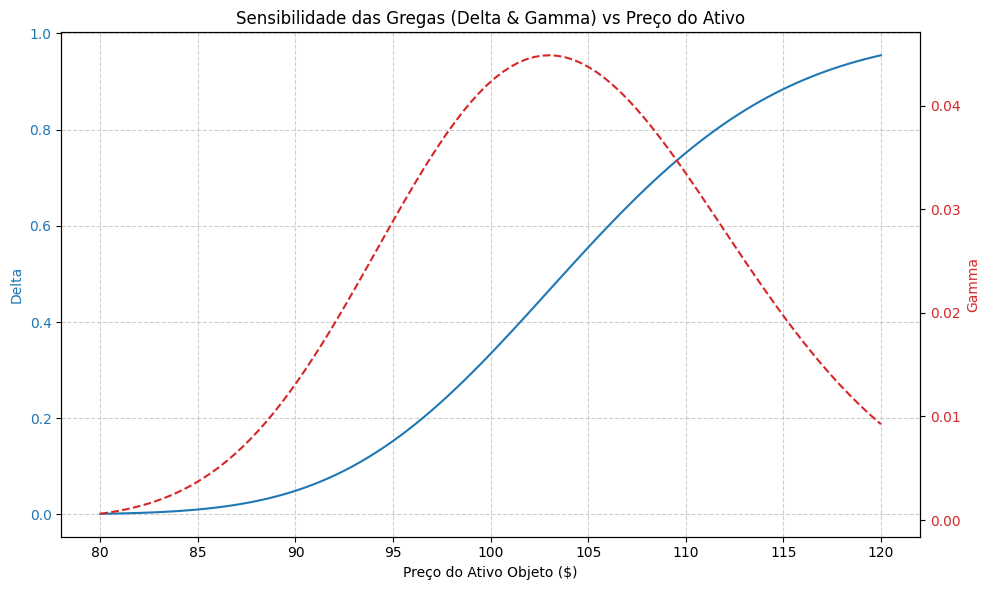

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class OptionGreeks:
    """
    Modelo para cálculo de preço e Gregas de Opções Europeias (Black-Scholes).
    """
    def __init__(self, S, K, T, r, sigma):
        self.S = S      # Preço do Ativo Objeto
        self.K = K      # Strike (Preço de Exercício)
        self.T = T      # Tempo até o vencimento (em anos)
        self.r = r      # Taxa de juros livre de risco (anual)
        self.sigma = sigma  # Volatilidade implícita (anual)

    def d1(self, S):
        return (np.log(S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))

    def d2(self, S):
        return self.d1(S) - self.sigma * np.sqrt(self.T)

    def call_delta(self, S):
        return norm.cdf(self.d1(S))

    def gamma(self, S):
        return norm.pdf(self.d1(S)) / (S * self.sigma * np.sqrt(self.T))

# --- PARÂMETROS DE EXEMPLO ---
S_atual = 100    # Preço atual da ação
K_strike = 105   # Strike da Call
T_days = 30 / 365 # 30 dias para o vencimento
r_rate = 0.10    # Selic/Juros em 10%
vol = 0.30       # Volatilidade de 30%

# Criando a instância
option = OptionGreeks(S_atual, K_strike, T_days, r_rate, vol)

# --- VISUALIZAÇÃO ---
prices = np.linspace(80, 120, 100) # Range de preços para o gráfico
deltas = [option.call_delta(p) for p in prices]
gammas = [option.gamma(p) for p in prices]

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Preço do Ativo Objeto ($)')
ax1.set_ylabel('Delta', color=color)
ax1.plot(prices, deltas, color=color, label='Delta')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Gamma', color=color)
ax2.plot(prices, gammas, color=color, label='Gamma', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sensibilidade das Gregas (Delta & Gamma) vs Preço do Ativo')
fig.tight_layout()
plt.show()